<a href="https://colab.research.google.com/github/kalingts/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df= pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Preprocessing

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## NaN values

In [56]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
import numpy as np
col=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
for i in col:
  df[i]=df[i].replace(0,np.NaN)#Making 0 as null values
  df[i].fillna(df[i].mean(),inplace=True) #filling it with null values
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Outliers/Skewness

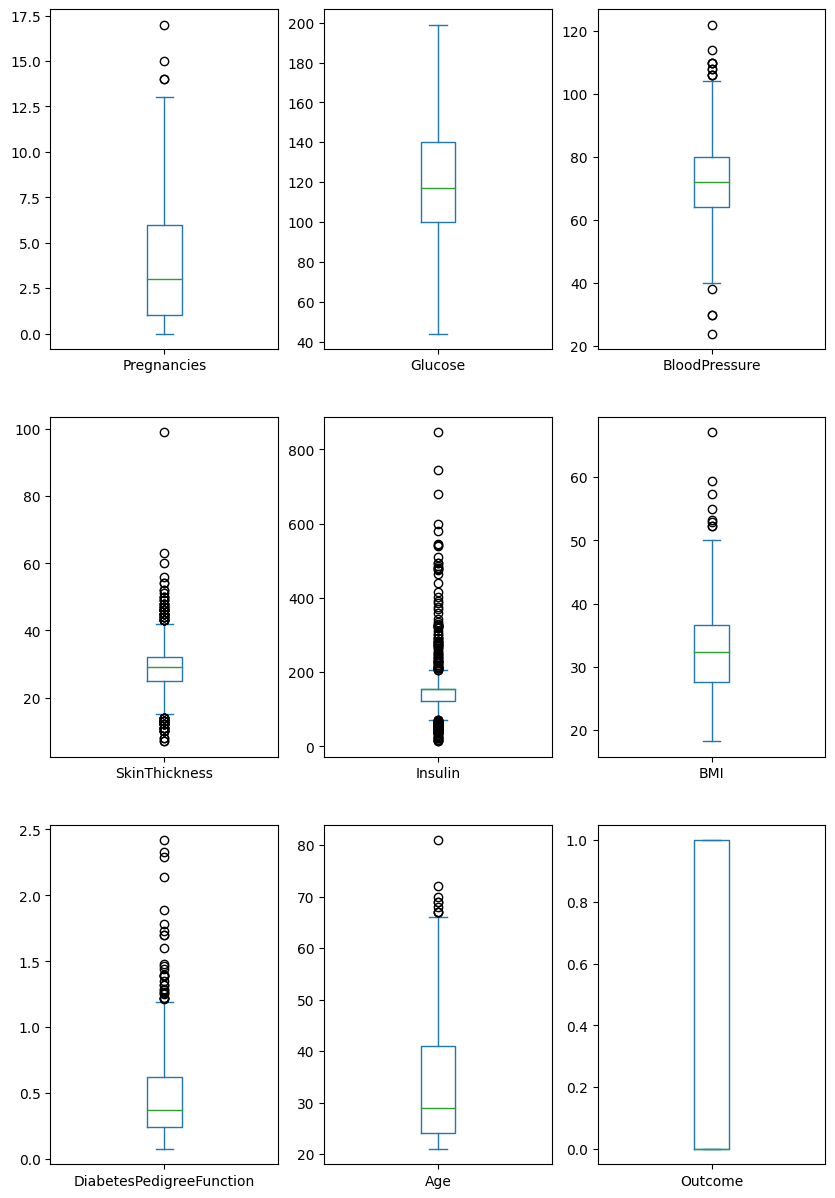

In [59]:
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,15))
plt.show()

In [ ]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.532719
BloodPressure               0.137305
SkinThickness               0.822173
Insulin                     3.019084
BMI                         0.598253
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

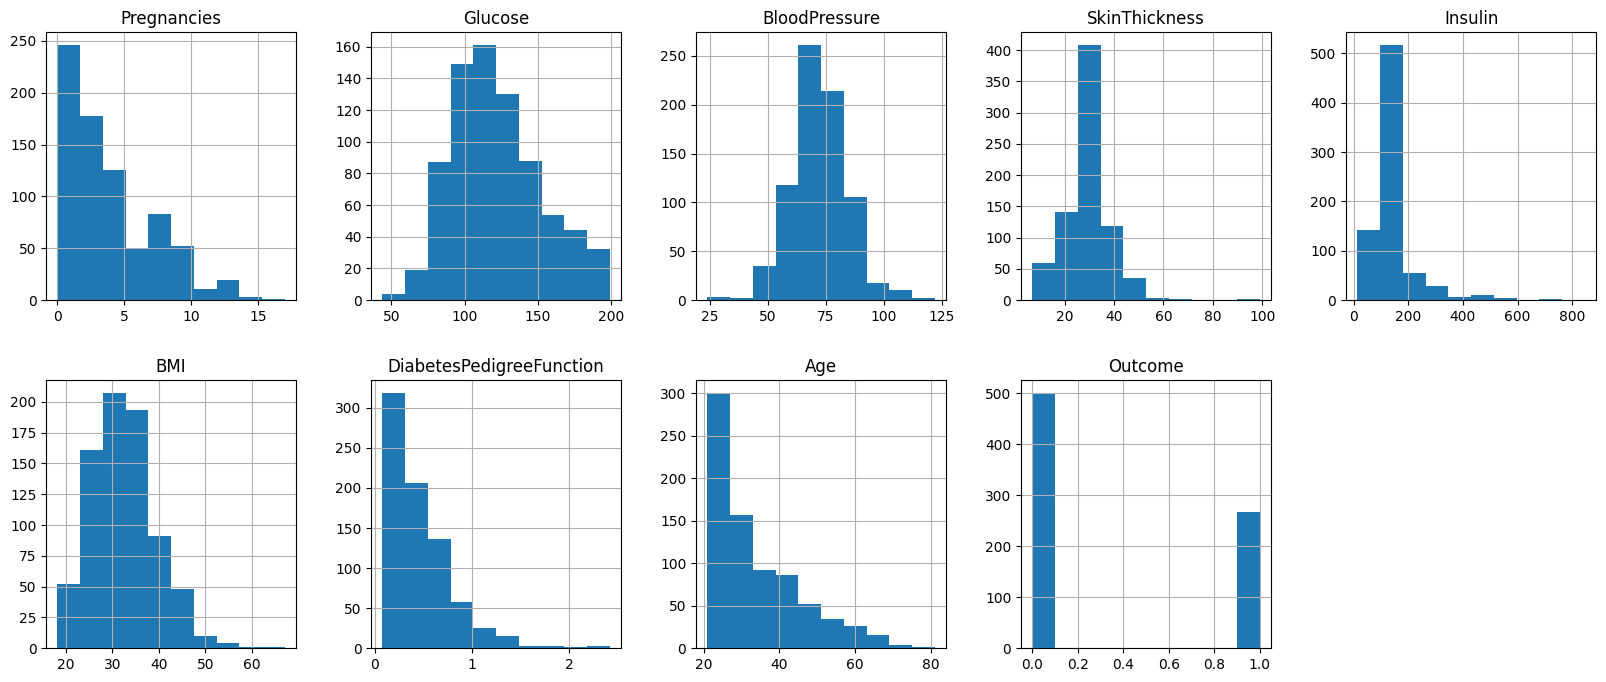

In [ ]:

df.hist(layout=(2,5),figsize=(20,8))
plt.show()

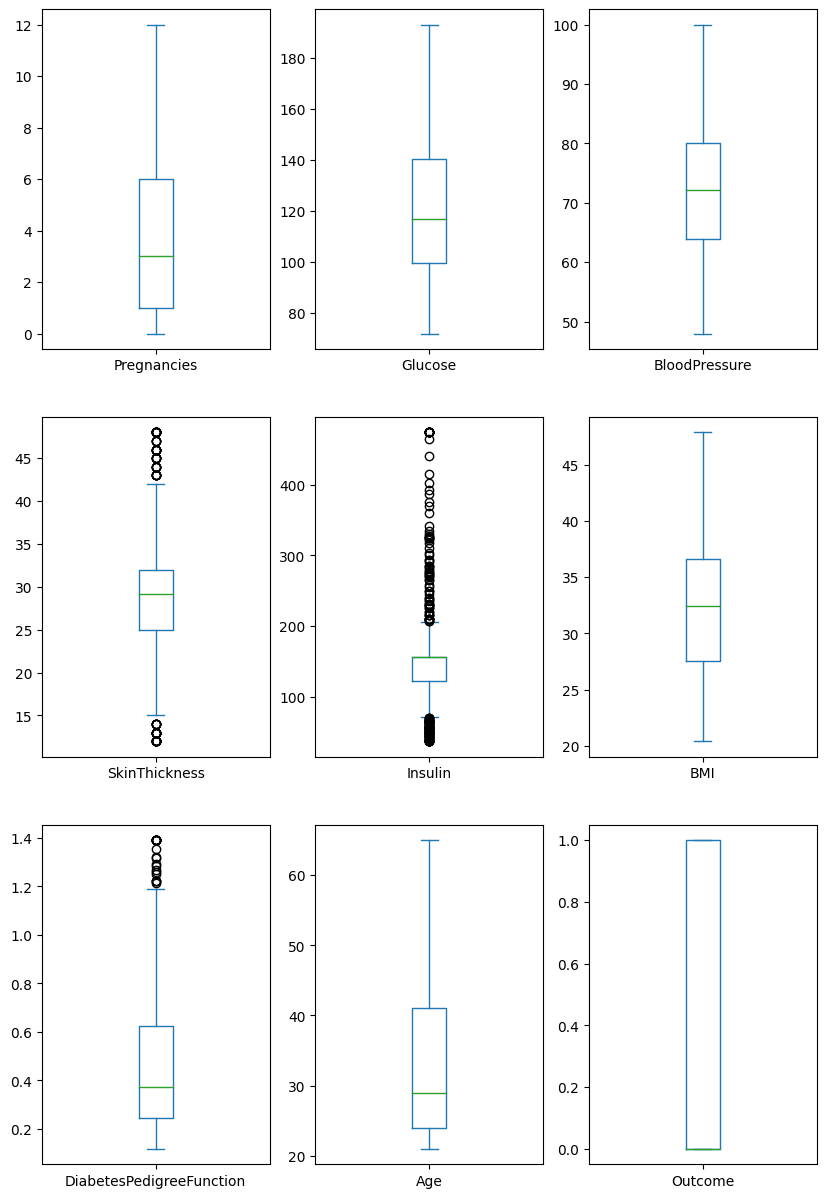

In [61]:
from scipy.stats.mstats import winsorize
col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in col:
  df[i]=winsorize(df[i],(0.02,0.02))


df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,15))
plt.show()


<Axes: >

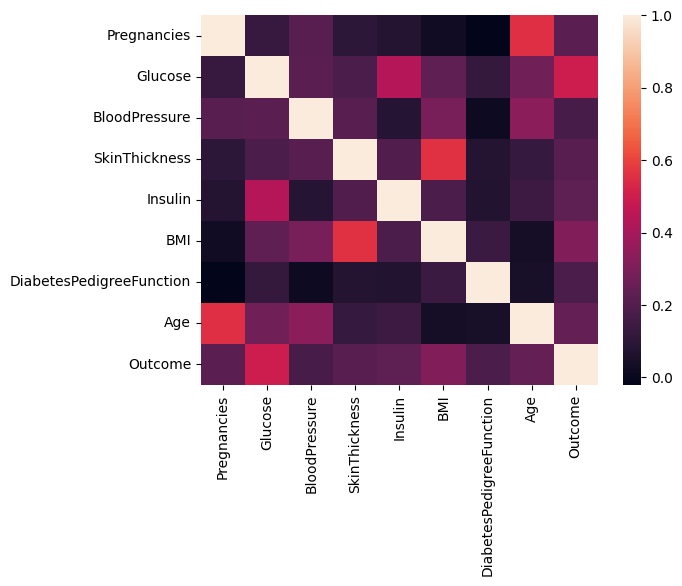

In [ ]:
sns.heatmap(df.corr())

<Axes: xlabel='Pregnancies'>

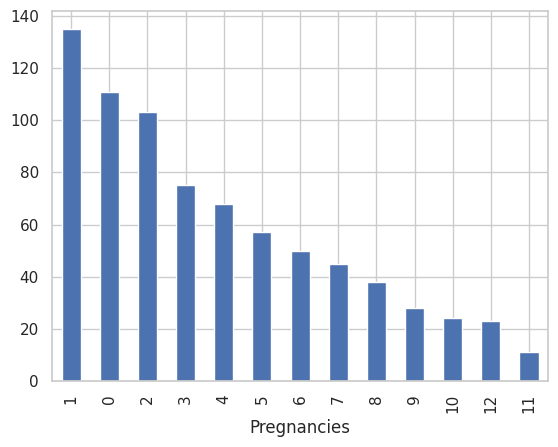

In [ ]:
df['Pregnancies'].value_counts().plot(kind='bar')

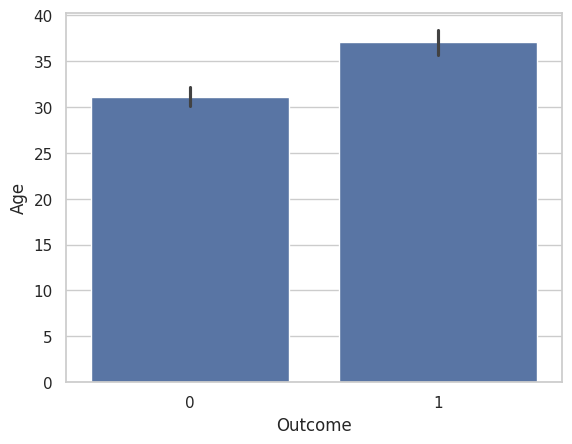

In [ ]:
import seaborn as sns
sns.barplot(x='Outcome',y='Age',data=df)
plt.show()

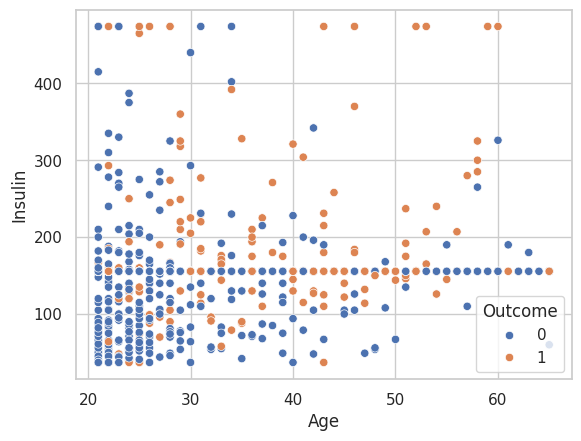

In [ ]:
sns.scatterplot(df,x='Age',y='Insulin',hue='Outcome')
plot.show()

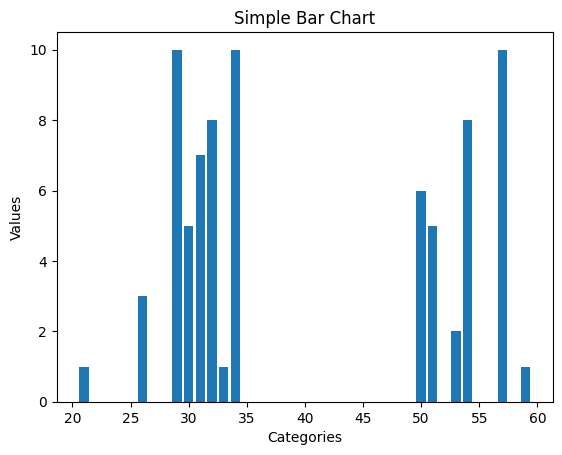

In [ ]:
d=df.head(20)
plt.bar(d['Age'], d['Pregnancies'])

# Adding titles and labels
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Simple Bar Chart')

# Display the chart
plt.show()


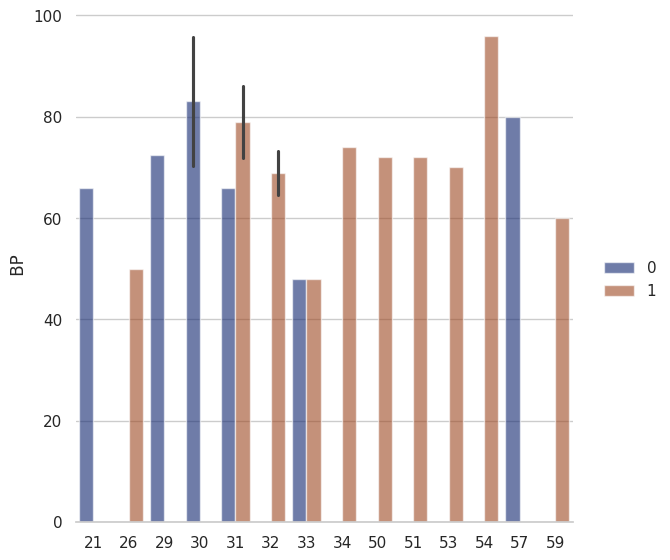

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    df.head(20), kind="bar",
    x="Age", y="BloodPressure", hue="Outcome",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", " BP")
g.legend.set_title("")

https://github.com/ManuhIsMe/Product_Sales_Analysis_With_Python/tree/main/Product_Analysis

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [84]:
#Selecting Features and Target
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']].values
y=df[['Outcome']].values

<Axes: xlabel='0'>

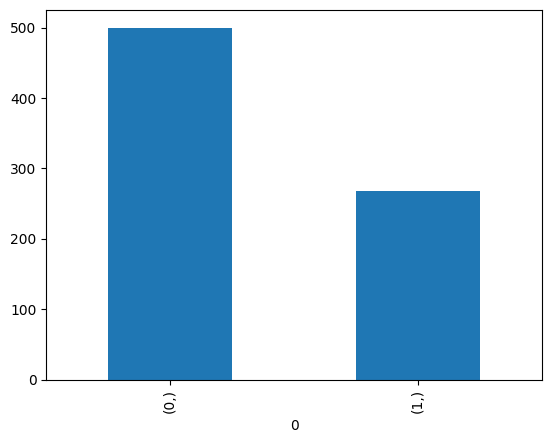

In [63]:
pd.DataFrame(y).value_counts().plot(kind='bar')

In [85]:
#Oversampling using smote(Synthetic Minority Over-sampling TEchnique)
#It is a more sophisticated technique than the previous ones.
#Random sampling is easy, but the new samples don’t add more information to the machine learning algorithms. SMOTE improves on that.

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=888)
x, y = smote.fit_resample(x, y)

<Axes: xlabel='0'>

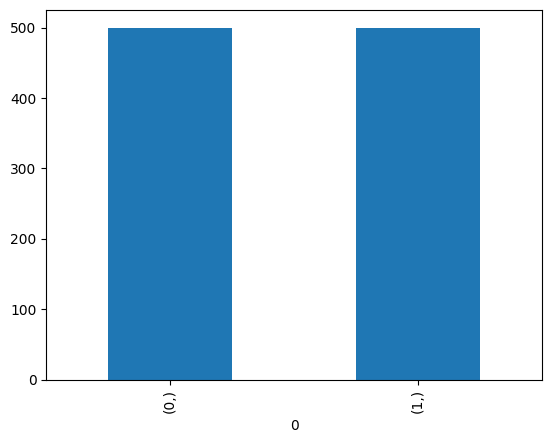

In [65]:
pd.DataFrame(y).value_counts().plot(kind='bar')

## **Normalization**

In [86]:
# To save model file
import pickle

In [87]:
# data normalization with sklearn
# standard scaler -> StandardScaler() - -1 to 1 or MinMaxScaler() - 0 to 1
from sklearn.preprocessing import StandardScaler
# fit scaler on training data
scaler = StandardScaler().fit(x)

#saving pickle file for scaling
pickle.dump(scaler, open('scaling_Classification.pkl', 'wb'))

# transform training data
x = scaler.transform(x)

## **Train Test Split**

In [88]:
from sklearn.model_selection import train_test_split

#spliting train and test
X_train, X_test, Y_train, Y_test = train_test_split(x,y.reshape(-1),test_size=0.2,random_state=888)

In [89]:
#LogisticRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train)

# Test the LogisticRegression model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
print("Accuracy:", accu)

Accuracy: 0.74


In [90]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 3}

In [92]:
#KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

# Test the KNeighborsClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
print("Accuracy:", accu)

Accuracy: 0.77


In [93]:
#RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=99)
model.fit(X_train, Y_train)

# Test the RandomForestClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
print("Accuracy:", accu)

Accuracy: 0.79


In [94]:
#metrics
from sklearn.metrics  import accuracy_score,confusion_matrix, f1_score,roc_auc_score,classification_report
Y_pred=model.predict(X_test)
print('confusion_matrix\n',confusion_matrix(Y_test, Y_pred))
print('accuracy_score',accuracy_score(Y_test, Y_pred))
print('f1_score',f1_score(Y_test, Y_pred))
print('roc_auc_score',roc_auc_score(Y_test, Y_pred))
print('classification_report\n',classification_report(Y_test, Y_pred))

confusion_matrix
 [[83 27]
 [15 75]]
accuracy_score 0.79
f1_score 0.78125
roc_auc_score 0.793939393939394
classification_report
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       110
           1       0.74      0.83      0.78        90

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



In [95]:
#creating pickle files to save the trained models in a file

#RandomForestClassifier model
model = RandomForestClassifier(n_estimators=99)
model.fit(X_train, Y_train)

pickle.dump(model, open('classification.pkl', 'wb'))

In [96]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,48.0,35.00000,168.000000,43.1,1.391,33,1


In [106]:
Pregnancies=1
Glucose=89.0
BloodPressure=66.0
SkinThickness=23.00000
Insulin=94.000000
BMI=28.1
DiabetesPedigreeFunction=0.167
Age=21
x_val=[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

In [ ]:
Pregnancies=8
Glucose=183.0
BloodPressure=64.0
SkinThickness=29.15342
Insulin=155.548223
BMI=23.3
DiabetesPedigreeFunction=0.672
Age=32
x_val=[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

In [107]:
# fit scaler on training data
pickled_scaling = pickle.load(open('scaling_Classification.pkl', 'rb'))
x_=pickled_scaling.transform([x_val])

#loading a trained model from pickle file
pickled_model = pickle.load(open('classification.pkl', 'rb'))
pred=pickled_model.predict(x_)
if pred[0]==1:
  print('Diabetic')
elif pred[0]==0:
  print('Non-Diabetic')

Non-Diabetic
